In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wrangle import wrangle, wrangle_explore
from sklearn.model_selection import train_test_split

# Stats
from scipy.stats import mannwhitneyu
from scipy.stats import levene

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")
import warnings
warnings.filterwarnings("ignore")

In [2]:
train, validate, test = wrangle_explore()

# What are drivers for coffee recieving an excellent_rating?

In [3]:
train.head()

,country,region,number_of_bags,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters,bag_weight,grading_month,grading_year,grading_day,excellent_rating
108,Taiwan,natou county,20,2015,2015-06-09,Typica,Semi-washed / Semi-pulped,7.67,7.83,8.00,7.58,8.0,7.92,10.0,10.0,10.0,7.92,84.92,0.11,0,0.0,Green,0,800.0,40.0,6,2015,9,1
984,Brazil,south of minas,17,2012,2012-01-23,Mundo Novo,Natural / Dry,7.42,7.33,7.25,7.42,7.5,7.17,10.0,10.0,10.0,7.08,81.17,0.12,0,0.0,Green,1,1000.0,60.0,1,2012,23,0
186,Mexico,tuxtla gutierrez,100,2012,2012-07-27,Typica,Washed / Wet,8.00,7.75,7.75,7.83,7.5,7.67,10.0,10.0,10.0,7.83,84.33,0.12,0,0.0,Blue-Green,1,1700.0,80.0,7,2012,27,1
798,Laos,lao p.d.r.,1,2015,2015-11-05,Other,Washed / Wet,7.42,7.50,7.25,7.33,7.5,7.50,10.0,10.0,10.0,7.50,82.00,0.12,0,0.0,Blue-Green,0,1250.0,2.0,11,2015,5,0
794,Honduras,el paraíso,275,2017,2017-06-01,Caturra,Washed / Wet,7.50,7.50,7.17,7.50,7.5,7.42,10.0,10.0,10.0,7.42,82.00,0.12,0,0.0,Green,1,1600.0,69.0,6,2017,1,0


# Orginally hypothesis

    -The altitude_mean_meters and the processing_method are the two most important drivers for coffee rating of 84 or higher

# Question # 1

    Is the average elevation for a coffee rated 84 or higher different than coffee whos rating is less than 84?

### Setting up seperate dataframes

In [4]:
# coffee with excellent rating into df_rating
df_rating = train[train['excellent_rating'] == 1]


# coffee with without excellent rating into df_without
df_without = train[train['excellent_rating'] != 1]

In [5]:
# checking number of values in each
len(df_rating), len(df_without)

(74, 397)

### Checking Mean

In [6]:
# with excellent rating altitude mean
df_rating.altitude_mean_meters.mean()

1474.7078486486487

In [7]:
# witout excellent rating altitude mean
df_without.altitude_mean_meters.mean()

1283.3805017632253

### Checking Median

In [8]:
# with excellent rating altitude median
df_rating.altitude_mean_meters.median()

1500.0

In [9]:
# witout excellent rating altitude median
df_without.altitude_mean_meters.median()

1300.0

### Graph

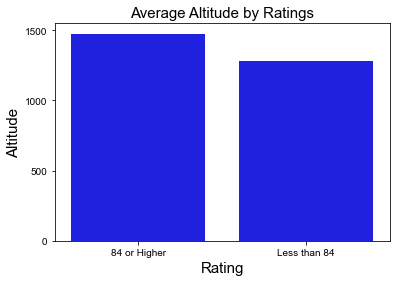

In [10]:
rating = ['84 or Higher', 'Less than 84']
rating_mean = [df_rating.altitude_mean_meters.mean(), df_without.altitude_mean_meters.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('Rating',fontsize = 15, )
ax.set_ylabel('Altitude',fontsize = 15)
ax.set_title('Average Altitude by Ratings', fontsize = 15)
sns.set(font_scale = 2)
ax.set(xlabel='Rating', ylabel='Altitude')
plt.show()

### Question 1 At A Glance

    - 84 or higher rated coffee did have a higher altitude_mean_meters mean & median than coffee whos rating was less than 84.  
    - The mean and median were not too far off from one another for both rated and without

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [11]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    Yes, I seperated excellent rated from non excellent rated

### Normally Distributed?
    - 84 or higher rated coffee is kind of normally distributed
    - Less than 84 rated coffee is normally distributed

<AxesSubplot:>

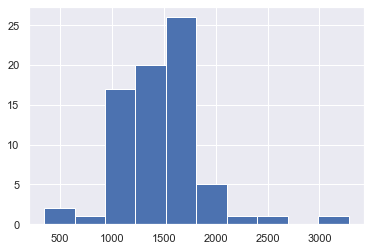

In [12]:
sns.set(font_scale = 1)
df_rating.altitude_mean_meters.hist()

<AxesSubplot:>

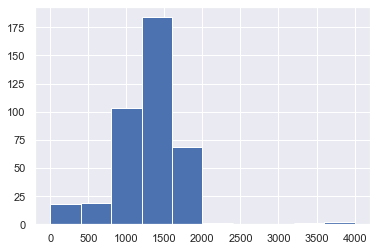

In [13]:
df_without.altitude_mean_meters.hist()

### Equal Variances?
    - The leven test concluded the populations did have equal variances.

In [14]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stats, p

(0.021379281974425353, 0.8838132589858562)

In [15]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do have equal variances


### Mann-Whitney's Test
    Assumptions were not met because I didn't feel comfortable with the distribution of coffee rated 84 or higher.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: There is no difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.
### $H_a$: There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.

In [16]:
stat, p = mannwhitneyu(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stat, p

(10937.0, 0.0002396750351056147)

In [17]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject Null Hypothesis


### Hypotheis Results
    - There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee

### Question 1 Takeway
    - I have a 95% confidence level that there is a difference in altitude between 84 or higher rated and less than 84 rated coffee.  
    - 84 or higher rated coffee has a higher mean/median altitude than less than 84 rated coffee
    - altitude_mean_meters seems to be a good fit or useful for modeling.  I will include it in my models and see if this is true. 

# Question 2

    - Which processing_method has a higher percentage of 84 or higher rated coffee?

In [18]:
train.processing_method.value_counts()

Washed / Wet                 359
Natural / Dry                 84
Semi-washed / Semi-pulped     28
Name: processing_method, dtype: int64

In [19]:
df_plus = train[train.excellent_rating == 1]

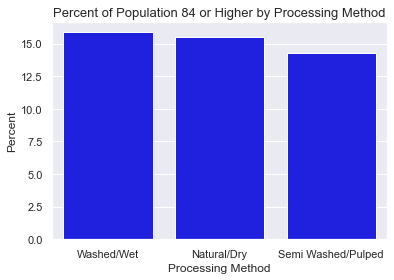

In [20]:
# Creating a series with percentages of processing method 84 or higher rated coffee by population
s = ((df_rating.processing_method.value_counts()/train.processing_method.value_counts())*100).sort_values(ascending = False)

# Graphing The Series
index_ = list(s.index)
index_[0] = 'Washed/Wet'
index_[1] =  'Natural/Dry'
index_[2] = 'Semi Washed/Pulped'
s.index = index_
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84 or Higher by Processing Method', fontsize = 13)
sns.set(font_scale = 1.1)
ax.set(xlabel='Processing Method', ylabel='Percent')
plt.show()

### Question 2 Takeway
    - Washed/Wet had more 84 or higher rated coffee but not by much
    - I was hoping to see a bigger trend in 84 or higher rated coffee
    - The three processing process are fairly close.
    - I will added them to my model to see if they provide value and document the resutls

# Question 3

    - Which variety has a higher percentage of 84 or higher rated coffee?

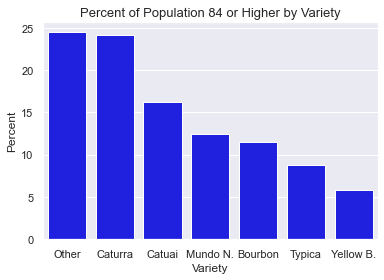

In [28]:
s = ((df_rating.variety.value_counts()/train.variety.value_counts())*100).sort_values(ascending = False)
index_ = list(s.index)
index_[3] = 'Mundo N.'
index_[6] = 'Yellow B.'
s.index = index_

ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84 or Higher by Variety', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Variety', ylabel='Percent')
plt.show()

### Question 3 Takeway
    - 'Other' had more 84 or higher rated coffee than any other variety
    - There was a lot of variance in the variety percentage 84 or higher by total population
    - 'variety' seems like a good feature to use in modeling.  I will use it and document the results

# Question 4

    - Which harvest year had a higher percentage of 84 or higher rated coffee?

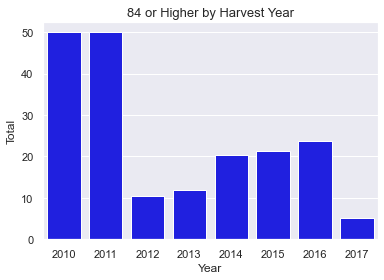

In [29]:
# Creating a series with percentages of harvest year 84 or higher rated coffee by population
s = ((df_rating.harvest_year.value_counts(ascending=True)/train.harvest_year.value_counts(ascending=True))*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Harvest Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

### Question 4 Takeway

    - There were only a few values for the year 2010 & 2011. Although those years seem like they did well, they are really outliers.
    - Also keep in mind I filled in missing values for harvest year as the median so this feature might not be the best for modeling.
    - If time allows I will try and see how it does in my model, as it is, and document the results.
    - If time allows I will also remove outliers to see if its boosts model performance and document the results.

# Question 5

    - Which grading year had a higher percentage of 84 or higher rated coffee?

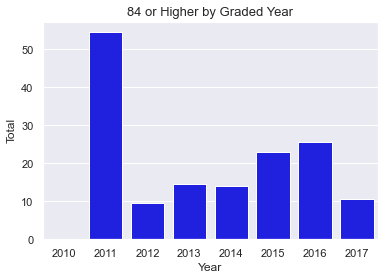

In [23]:
# Creating a series with percentages of graded year 84 or higher rated coffee by population
s = (df_rating.grading_year.value_counts()/train.grading_year.value_counts()*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Graded Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

### Question 5 Takeway
    - The grading year of 2011 was the greatest year for 84 or higher rated coffee.
    - This feature was more dependable than harvest year because zero values were missing
    - This features seems useful to try and use in my model
    - I will add it and document the results

# Question 6

    - Which grading month had a higher percentage of 84 or higher rated coffee?

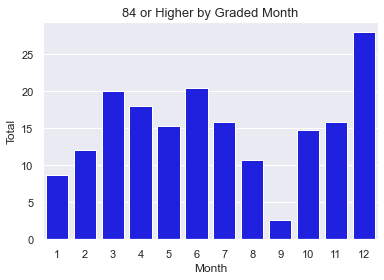

In [24]:
# Creating a series with percentages of graded year 84 or higher rated coffee by population
s = (df_rating.grading_month.value_counts()/train.grading_month.value_counts()*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Graded Month', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Month', ylabel='Total')
plt.show()

### Question 6 Takeway
    - The "grading_month" of Decemeber was the greatest month for 84 or higher rated coffee.
    - This features seems useful to try and use in my model
    - I will add it and document the results